<a href="https://colab.research.google.com/github/Ru1chi/Deep_learning/blob/main/MNIST_Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Work Flow in Deep Learningdataset-->image processing--> train test split--> Neural Network--> Trained Neural Network--> New Image to Hand Written Digit Prediction

In [ ]:
#import important dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

## **Loading MNIST data**

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
#know the shape of the numpy array
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data=60000

testing data=10000

image dimension=28,28

In [ ]:
#printing the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


3


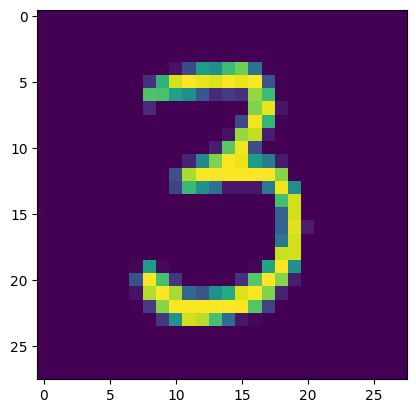

In [ ]:
plt.imshow(x_train[50])
plt.show


#print the corresponding label
print(y_train[50])

0


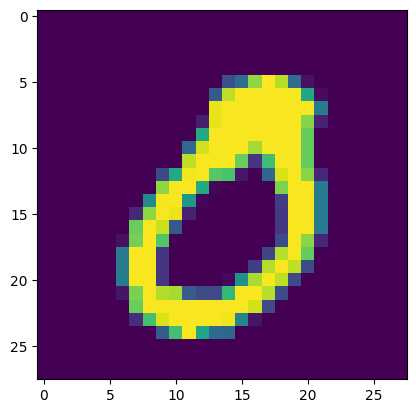

In [ ]:
plt.imshow(x_train[75])
plt.show


#print the corresponding label
print(y_train[75])

9


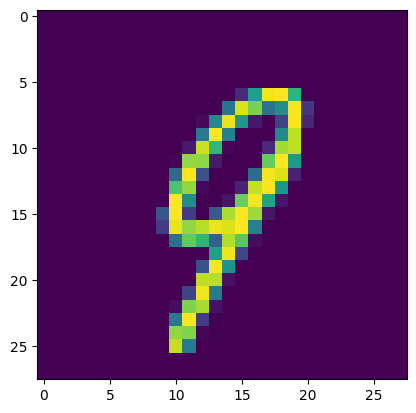

In [ ]:
plt.imshow(x_train[22])
plt.show


#print the corresponding label
print(y_train[22])#label is printed first as 9

In [ ]:
print(y_train.shape,y_test.shape)#y_train=lables for training data ,y_test=labels for testing data

(60000,) (10000,)


In [ ]:
#unique values in y_train
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this labels as such or we can apply One Hot Encoding(if label is 0-first value will be 1 and the rest will be 0

0-1000000....


All the images have the same dimension in this dataset.If not we have to resize the images as we would not be ables to keep all the images into numpy array.


In [ ]:
#scalling the values between o-1
#also called normalization as the x_test is in the range 0-255
x_train=x_train/255#if we don not do this we get lower accuracy
x_test=x_test/255


In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network



In [ ]:
#setting layers for Neural Network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')#we have 10 labels therefore the output layer has 10 neurons to display
])

In [ ]:
#compiling the network model
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
#trainig the neural network

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.3016 - accuracy: 0.9132
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1400 - accuracy: 0.9585
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1058 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0846 - accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0710 - accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0610 - accuracy: 0.9805
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0524 - accuracy: 0.9831
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0478 - accuracy: 0.9843
Epoch 9/10
 626/1875 [=========>....................] - ETA: 3s - loss: 0.0381 - accuracy: 0.9879

Training data accuracy=98.89%

Accuracy on test_data


In [18]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1012 - accuracy: 0.9730
0.9729999899864197


Test_data accuracy=97.255

In [19]:
print(x_test.shape)

(10000, 28, 28)


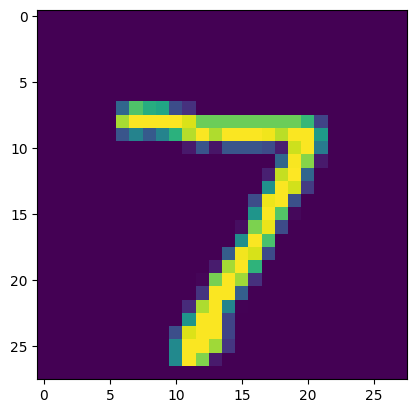

In [20]:
#first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [21]:
print(y_test[0])#this is the label

7


In [22]:
y_pred=model.predict(x_test)#all 10000 predictions will be stored in y_pred|| in ML model.predict will return the label value of the x_test where in DL probability of each labels

313/313 [==============================] - 1s 2ms/step


In [23]:
y_pred.shape

(10000, 10)

In [24]:
print(y_pred[0])#gives the probability for values 0 to 9

[9.8822545e-04 1.8655905e-01 7.0000362e-01 9.9990207e-01 3.4166587e-04
 4.4994122e-01 3.5666886e-10 9.9999958e-01 7.3448491e-01 9.6056145e-01]


In [25]:
#converting the prediction probability to class lables
label_for_first_test_image=np.argmax(y_pred[0])


In [26]:
print(label_for_first_test_image)

7


In [27]:
#now do the same for 10000 datapoints
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)


[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test---. true labels

y_pred_labels---->predicted lables

## Confusion matrix

In [28]:
cof_mat=confusion_matrix(y_test,y_pred_labels)

In [29]:
print(cof_mat)

tf.Tensor(
[[ 959    0    3    1    0    5    4    1    6    1]
 [   0 1123    5    1    0    2    1    0    3    0]
 [   2    0  999   10    2    0    3    4   12    0]
 [   1    0    4  965    0   24    0    6    8    2]
 [   2    2    1    1  958    2    5    1    1    9]
 [   1    0    0    5    1  868    6    1    6    4]
 [   2    2    2    1    2    8  939    0    2    0]
 [   0    6    8    1    4    0    1 1000    3    5]
 [   0    0    3    5    4    7    1    1  948    5]
 [   1    2    0    7   16    5    2    6    4  966]], shape=(10, 10), dtype=int32)


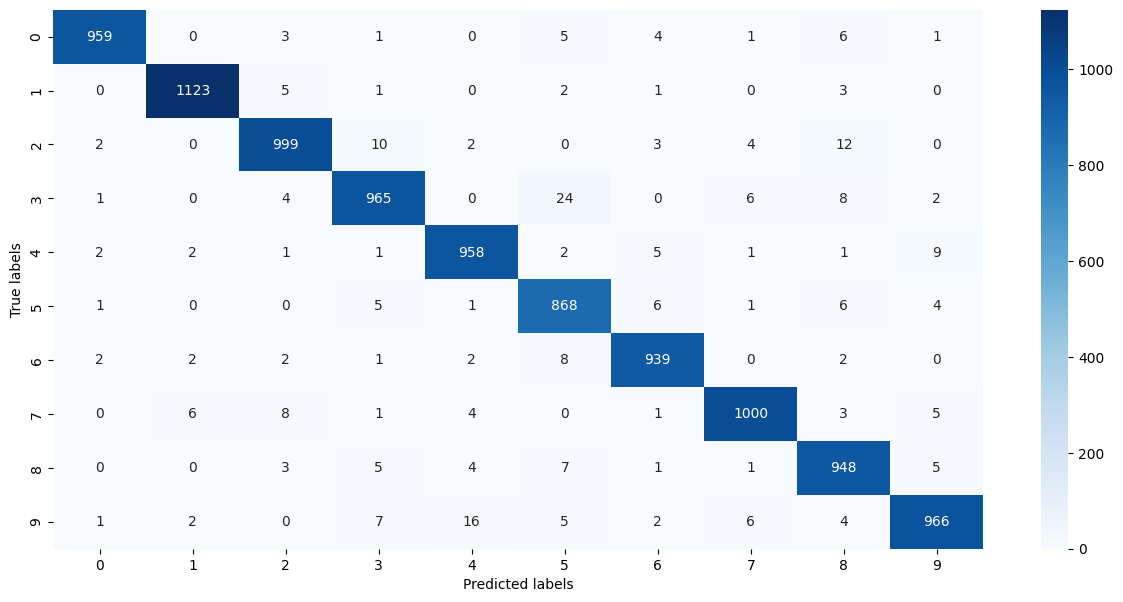

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(cof_mat,annot=True ,fmt='d',cmap='Blues')#fmt is used as the data is in the form of integer
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

Building a predictive System

In [41]:
input_img_path='/content/MNIST_digit.png'

In [42]:
#convert to numpy array
input_img=cv2.imread(input_img_path)

In [43]:
type(input_img)

numpy.ndarray

In [44]:
print(input_img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
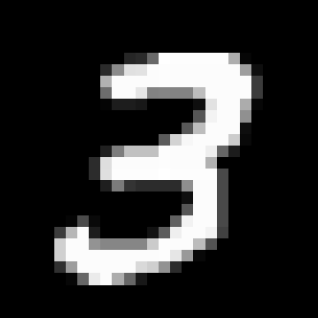

In [45]:
#show the image
input_img

In [46]:
grayscale=cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
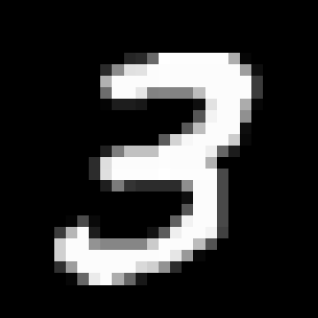

In [47]:
grayscale


In [48]:
input_img_resize=cv2.resize(grayscale,(28,28))#we need to resize the image as it is compatible with our model generated for the neural network that is (28,28)

In [49]:
input_img_resize.shape


(28, 28)

In [50]:
input_img_resize

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 139, 224, 226,
        252, 253, 252, 252, 252, 252, 252, 252, 158,  14,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 178, 252, 252, 252,
        252, 253, 252, 252, 252, 252, 252, 252, 252,  59,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 109, 252, 252, 230,
        131, 133, 131, 131, 189, 252, 252, 252, 252,  59,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  29,  29,  24,
          0,   0,   0,   0,  14, 226, 252, 252, 172,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  85, 243, 252, 252, 144,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  88, 189, 252, 252, 252,  14,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  91, 211, 247, 252, 252, 252, 204,   9,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 125, 193, 193,
        193, 253, 252, 252, 252, 238, 102,  28,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  44, 222, 252, 252, 252,
        252, 253, 252, 252, 252, 177,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  44, 223, 253, 253, 253,
        253, 255, 253, 253, 253, 253,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 123,  52,  44,
         44,  44,  44, 143, 252, 252,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  15, 252, 252,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  86, 252, 252,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   5,  75,   9,   0,   0,   0,   0,
          0,   0,  97, 242, 252, 252,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  60, 183, 252,  29,   0,   0,   0,   0,
         18,  92, 239, 252, 252, 243,  65,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 208, 252, 252, 147, 134, 134, 134, 134,
        203, 253, 252, 252, 188,  83,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 208, 252, 252, 252, 252, 252, 252, 252,
        252, 253, 230, 153,   8,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  48, 157, 252, 252, 252, 252, 252, 217,
        207, 146,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

## **The steps that i did to train the data should also be done for the input data**

In [51]:
#standardize the data
input_img_resize=input_img_resize/255

In [52]:
input_img_resize

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [53]:
#now reshape the image
input_img_reshaped=np.reshape(input_img_resize,[1,28,28])#for only 1 image


In [54]:
type(input_img_reshaped)

numpy.ndarray

In [55]:
input_prediction=model.predict(input_img_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 25ms/step
[[3.0793681e-13 1.6376686e-01 1.2514519e-02 1.0000000e+00 7.7289947e-08
  9.9795902e-01 1.1178858e-14 9.7439867e-01 9.6293032e-01 9.8228937e-01]]


In [56]:
input_pred_label=np.argmax(input_prediction)

In [57]:
print(input_pred_label)

3


Path of image to be predicted:/content/MNIST_digit.png


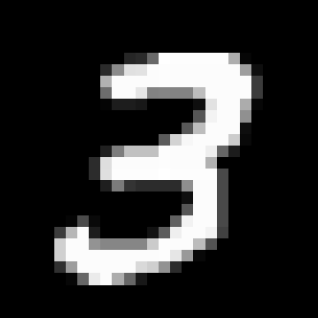

1/1 [==============================] - 0s 20ms/step
The handwritten Digit is recognized as 3


In [59]:
input_img_path=input('Path of image to be predicted:')

input_img=cv2.imread(input_img_path)

cv2_imshow(input_img)

grayscale=cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)


input_img_resize=cv2.resize(grayscale,(28,28))#we need to resize the image as it is compatible with our model generated for the neural network that is (28,28)

input_img_resize=input_img_resize/255

input_img_reshaped=np.reshape(input_img_resize,[1,28,28])#for only 1 image

input_prediction=model.predict(input_img_reshaped)

input_pred_label=np.argmax(input_prediction)

print('The handwritten Digit is recognized as', input_pred_label)



